# Check `GDS` stack

This notebook checks all software requirements for the course Geographic Data Science are correctly installed. 

A successful run of the notebook implies no errors returned in any cell *and* every cell beyond the first one returning a printout of `True`. This ensures a correct environment installed.

In [1]:
import pandas as pd
import scipy as sp
import matplotlib as mpl
import seaborn as sns

import statsmodels.api as sm
import sklearn

import pysal as ps
import clusterpy as cl
import fiona
import geopandas as gpd

ClusterPy: Library of spatially constrained clustering algorithms


In [2]:
float(pd.__version__[:4]) >= 0.16

True

In [3]:
float(sp.__version__[:4]) >= 0.16

True

In [4]:
float(sns.__version__[:3]) >= 0.6

True

In [5]:
float(mpl.__version__[:3]) >= 1.4

True

In [6]:
float(sm.version.version[:3]) >= 0.6

True

In [7]:
float(sklearn.__version__[:4]) >= 0.16

True

In [8]:
float(ps.version[:4]) >= 1.10

True

In [9]:
float(cl.__version__[:3]) >= 1.0

True

In [10]:
float(fiona.__version__[:3]) >= 1.5

True

In [11]:
float(gpd.__version__[:3]) >= 0.1

True

# Test

In [12]:
shp = ps.examples.get_path('columbus.shp')
db = gpd.read_file(shp)
db.head()

,AREA,COLUMBUS_,COLUMBUS_I,CP,CRIME,DISCBD,EW,HOVAL,INC,NEIG,...,NSA,NSB,OPEN,PERIMETER,PLUMB,POLYID,THOUS,X,Y,geometry
0,0.309441,2,5,0,15.725980,5.03,1,80.467003,19.531,5,...,1,1,2.850747,2.440629,0.217155,1,1000,38.799999,44.070000,"POLYGON ((8.624129295349121 14.23698043823242,..."
1,0.259329,3,1,0,18.801754,4.27,0,44.567001,21.232,1,...,1,1,5.296720,2.236939,0.320581,2,1000,35.619999,42.380001,"POLYGON ((8.252790451049805 14.23694038391113,..."
2,0.192468,4,6,0,30.626781,3.89,1,26.350000,15.956,6,...,1,1,4.534649,2.187547,0.374404,3,1000,39.820000,41.180000,"POLYGON ((8.653305053710938 14.00809001922607,..."
3,0.083841,5,2,0,32.387760,3.70,0,33.200001,4.477,2,...,1,1,0.394427,1.427635,1.186944,4,1000,36.500000,40.520000,"POLYGON ((8.459499359130859 13.82034969329834,..."
4,0.488888,6,7,0,50.731510,2.83,1,23.225000,11.252,7,...,1,1,0.405664,2.997133,0.624596,5,1000,40.009998,38.000000,"POLYGON ((8.685274124145508 13.63951969146729,..."


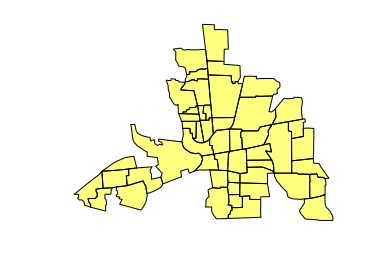

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
f, ax = plt.subplots(1)
for poly in db['geometry']:
    gpd.plotting.plot_multipolygon(ax, poly, facecolor='yellow')
ax.set_axis_off()
plt.show()

In [14]:
db.crs['init'] = 'epsg:26918'

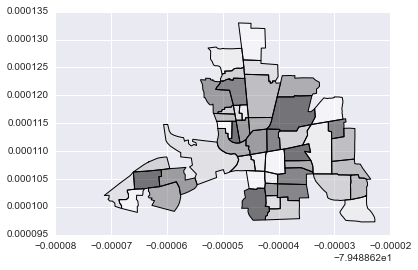

In [15]:
db_wgs84 = db.to_crs(epsg=4326)
db_wgs84.plot()
plt.show()

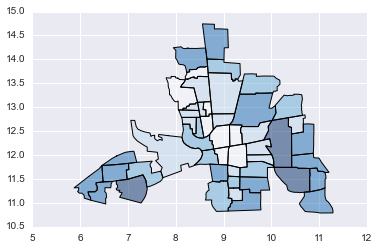

In [16]:
db.plot(column='INC', scheme='fisher_jenks', colormap=plt.matplotlib.cm.Blues)
plt.show()